# Hyperparameter Tuning


In [1]:
# Importing the libraries
import joblib
import os
import pandas as pd

In [2]:
# Load and preprocess the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)
train_data.head()

,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_0,3.008543,3.034567,3.056186,3.074934,3.056646,3.034059,3.008996,2.890665,2.767561,2.641773,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,13.4,0,1,0,0
p01_1,3.075262,3.056834,3.033923,3.008223,2.889655,2.766913,2.642046,2.523227,2.400222,2.274907,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,12.8,0,1,0,0
p01_2,3.008543,2.889829,2.766775,2.641311,2.522273,2.399587,2.275096,2.200327,2.121935,2.041447,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,15.5,0,1,0,0
p01_3,2.641586,2.522417,2.399445,2.274400,2.199423,2.121309,2.041582,1.988772,1.932700,1.874690,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,14.8,0,1,0,0
p01_4,2.274630,2.199540,2.121166,2.040910,1.987900,1.932081,1.874787,1.866292,1.854780,1.841338,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,12.7,0,1,0,0


In [3]:
X = train_data.drop(columns=['bg+1:00'])
y = train_data['bg+1:00']

### Define a tuning function

In [4]:
def tune(tuner, X, y):
    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X=X, y=y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), f'{tuner.__name__}.model.pkl')

### Tune XGBoost

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 0.9274497211646519),
             ('colsample_bytree', 0.7498174276996894),
             ('gamma', 8.268048167007025),
             ('lambda', 0.06777249605956756),
             ('learning_rate', 0.01974842035904076),
             ('max_depth', 5),
             ('min_child_weight', 1),
             ('n_estimators', 531),
             ('scale_pos_weight', 62),
             ('subsample', 0.7687422821452711)])

RMSE: 1.9167966275572572


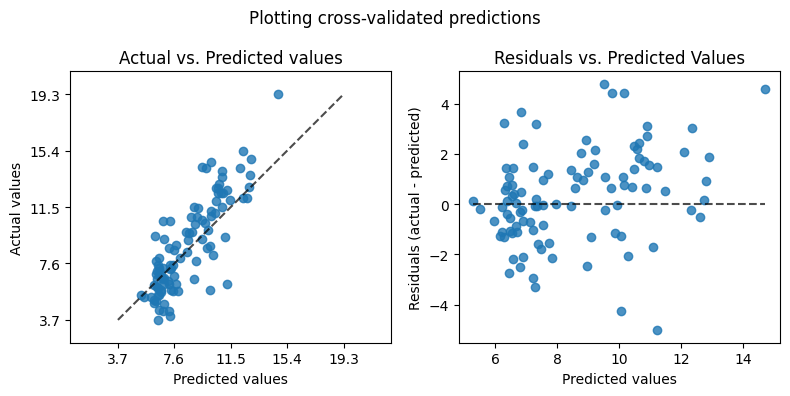

In [5]:
from src.features.tuners import XGBHyperparameterTuner

tune(XGBHyperparameterTuner(search_space='deep'), X, y)

### Tune ExtraTreesRegressor

-----------ExtraTreeRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('max_depth', 9),
             ('max_features', 1.0),
             ('min_samples_leaf', 10),
             ('min_samples_split', 8),
             ('splitter', 'random')])

RMSE: 2.064483225733907


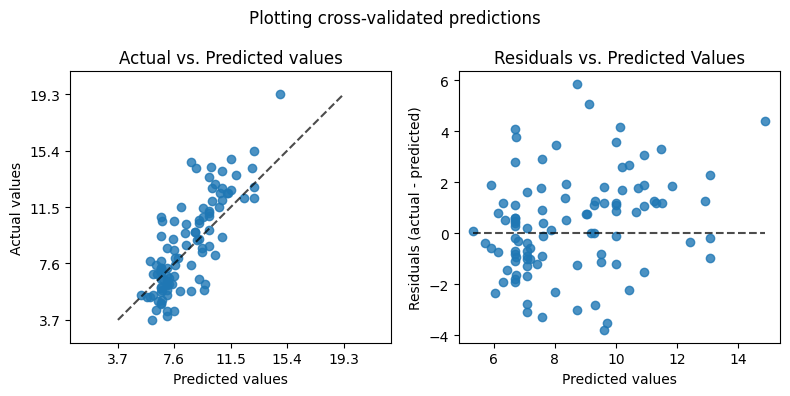

In [6]:
from src.features.tuners import ExtraTreesHyperparameterTuner

tune(ExtraTreesHyperparameterTuner(), X, y)

### Tune BaggingRegressor

-----------BaggingRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('max_features', 0.990383785781453),
             ('max_samples', 0.5098596888160258),
             ('n_estimators', 95)])

RMSE: 1.0927310589420436


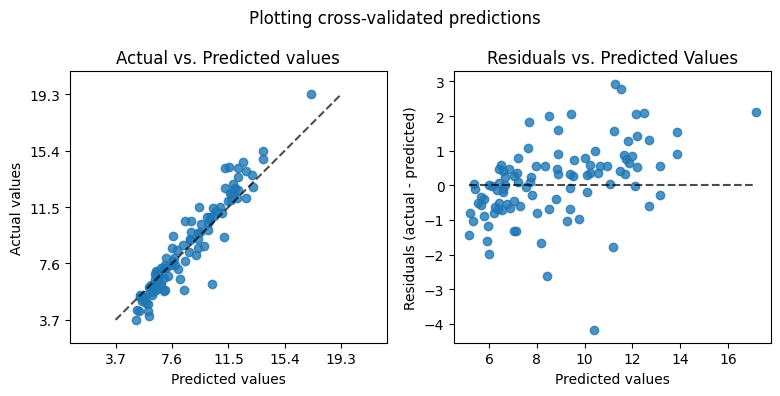

In [7]:
from src.features.tuners import BaggingHyperparameterTuner

tune(BaggingHyperparameterTuner(), X, y)